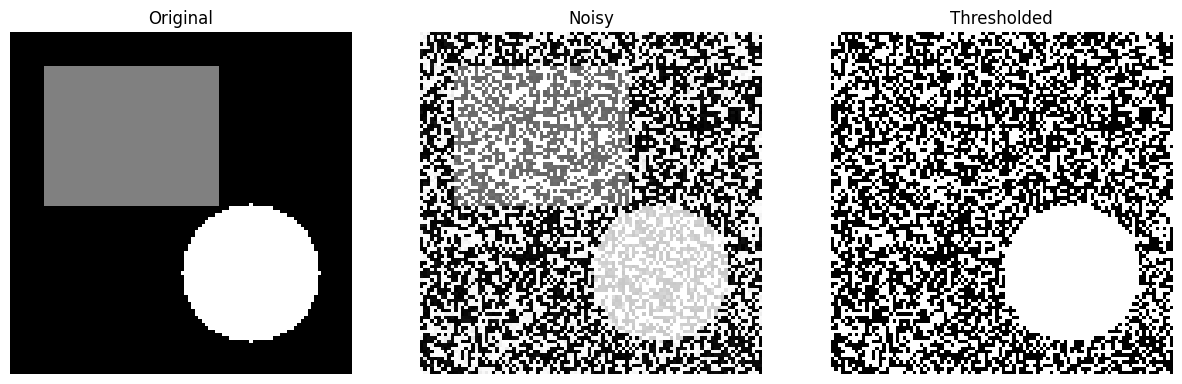

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to generate the image with objects and background
def generate_image():
    image = np.zeros((100, 100), dtype=np.uint8)  # Create a black image
    # Draw rectangle
    cv2.rectangle(image, (10, 10), (60, 50), 100, -1)  # larger rectangle
    # Draw circle
    cv2.circle(image, (70, 70), 20, 200, -1)  # smaller circle
    return image

# Function to add Gaussian noise to the image
def add_gaussian_noise(image, mean=0, stddev=10):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Function to implement Otsu's algorithm
def otsu_thresholding(image):
    _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded

# Main function
def main():
    # Generate image
    image = generate_image()

    # Add Gaussian noise
    noisy_image = add_gaussian_noise(image)

    # Apply Otsu's algorithm
    thresholded_image = otsu_thresholding(noisy_image)

    # Display results in three columns
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original')

    axs[1].imshow(noisy_image, cmap='gray')
    axs[1].set_title('Noisy')

    axs[2].imshow(thresholded_image, cmap='gray')
    axs[2].set_title('Thresholded')

    for ax in axs:
        ax.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


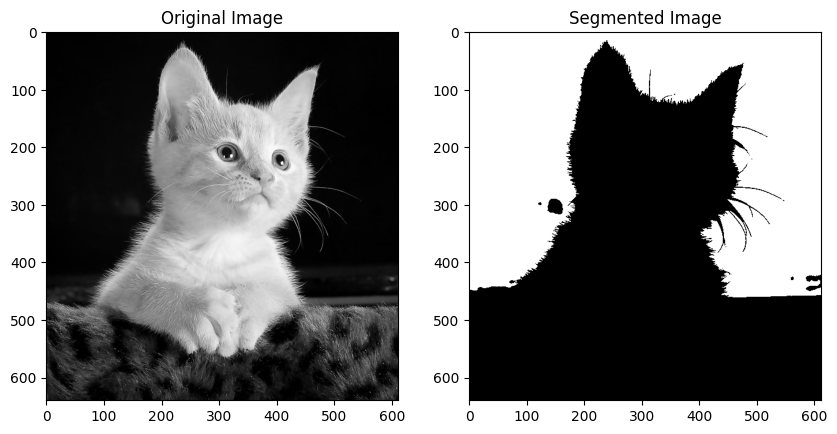

In [41]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold):
    # Create a mask to keep track of visited pixels
    height, width = image.shape[:2]
    visited = np.zeros((height, width), dtype=np.uint8)

    # Create a list to store the coordinates of pixels in the region
    region_coordinates = []

    # Define the 4-connectivity neighbors
    neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    # Convert seed coordinates to integers
    seed_x, seed_y = seed
    seed_x, seed_y = int(seed_x), int(seed_y)

    # Add the seed to the region and mark as visited
    region_coordinates.append((seed_x, seed_y))
    visited[seed_x, seed_y] = 1

    # Start region growing
    while len(region_coordinates) > 0:
        # Get the last pixel from the region
        current_pixel = region_coordinates.pop()

        # Check 4-connectivity neighbors
        for dx, dy in neighbors:
            x, y = current_pixel[0] + dx, current_pixel[1] + dy

            # Check if the neighbor is within the image bounds
            if 0 <= x < height and 0 <= y < width:
                # Check if the neighbor is not visited yet
                if visited[x, y] == 0:
                    # Check if the pixel value is within the threshold
                    if abs(int(image[x, y]) - int(image[seed_x, seed_y])) <= threshold:
                        # Add the neighbor to the region and mark as visited
                        region_coordinates.append((x, y))
                        visited[x, y] = 1

    return visited

# Load the image
image = cv2.imread('1.jpeg', cv2.IMREAD_GRAYSCALE)

# Set seed point and threshold
seed_point = (50, 50)
threshold = 20

# Perform region growing
segmentation = region_growing(image, seed_point, threshold)

# Plot the original image and the segmented image side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmentation * 255, cmap='gray')
plt.title('Segmented Image')

plt.show()
